# **Hybrid Recommendation Engine: Anime based on MyAnimeList**

- **Author:** Fatwa Nurhidayat
- **Email:** fatwa.nrhdyt@gmail.com

# **Project Overview**

**Background**<br>
In today's digital era, streaming platforms and content aggregators like *MyAnimeList* offer thousands of anime titles accessible to a global audience. However, as the volume of available content grows exponentially, users frequently experience choice overload, making it difficult to discover new anime that align with their personal preferences. This highlights the critical role of recommendation systems in filtering vast amounts of information and delivering highly relevant, personalized content suggestions.

To address this challenge, this project develops a robust recommendation engine utilizing two prominent approaches: *Content-Based Filtering* and *Collaborative Filtering*. 

For the **Content-Based Filtering** approach, the system recommends anime based on content similarity, such as genres, episodes, or types. This project employs the **TF-IDF (Term Frequency-Inverse Document Frequency)** technique to transform textual data (e.g., genres) into weighted numerical representations. To efficiently identify the most similar anime based on content, the system integrates **FAISS (Facebook AI Similarity Search)**, a highly optimized library for dense vector similarity search. By calculating similarities using Euclidean distance, FAISS enables the model to generate highly relevant recommendations based on item characteristics.

Complementing the content-based approach, this project also implements **Collaborative Filtering**, which leverages user interaction data—such as historical ratings—to recommend anime based on underlying user preference patterns. This is achieved using the **Singular Value Decomposition (SVD)** algorithm, a matrix factorization method that maps both users and items into a latent feature space. By learning the hidden relationships between users and items, the SVD model can accurately predict ratings for unwatched anime, thereby generating deeply personalized and precise recommendations.

The effectiveness of integrating these techniques is supported by recent literature. For instance, a study by **Prakash et al. (2022)** demonstrated that combining content-based methods with collaborative approaches significantly enhances the accuracy and efficiency of anime recommendation systems, particularly when addressing data sparsity and the cold-start problem.


**Strategic Impact & Business Value**
- **Personalized User Experience**<br>
Delivering highly relevant recommendations to increase user engagement, retention, and overall satisfaction when exploring the content catalog.
- **Efficient Content Discovery**<br>
Significantly reducing user exploration time by proactively suggesting relevant titles, eliminating the need to manually browse through thousands of options.
- **Real-World Data Implementation**<br>
Providing a practical, large-scale implementation of machine learning models using real-world public data from MyAnimeList, encompassing user interactions, explicit ratings, and rich metadata.
- **Algorithmic Evaluation & Comparison**<br>
Offering comprehensive insights into the strengths and limitations of content-based versus collaborative filtering approaches, establishing a strong analytical foundation for future continuous improvements.

**References**<br>
Prakash, V., Raghav, S., Sood, S., Pandey, M., & Arora, M. (2022). Deep anime recommendation system: Recommending anime using collaborative and content-based filtering. *2022 4th International Conference on Advances in Computing, Communication Control and Networking (ICAC3N)*. https://doi.org/10.1109/ICAC3N56670.2022.10074101

# **Business Understanding**

**Problem Statements**
1. **Information Overload & The Cold-Start Problem:** The massive growth of content catalogs often triggers information overload, making it difficult for users to discover relevant new titles. This risks lowering user engagement, particularly for new users with no interaction history (the *cold-start* problem).
2. **Lack of Deep Personalization:** Most conventional recommendation systems tend to focus on overall popularity (trending items) or macro-level genres, failing to deliver a hyper-personalized experience tailored to the unique preferences of individual users.
3. **Underutilized Data Assets:** Valuable large-scale data assets—such as content metadata (genres, formats, durations) and behavioral data (user interaction patterns and explicit ratings)—are often not optimally leveraged to extract actionable insights for recommendation strategies.

**Business Goals**
1. **Enhance User Engagement:** Develop an accurate and efficient recommendation engine to streamline the content discovery process, ultimately boosting user retention and satisfaction metrics (including accommodating new users).
2. **Drive Hyper-Personalization:** Create a deeply personal viewing experience by combining the analysis of content attribute characteristics with the exploration of global community behavioral patterns.
3. **Optimize Data Assets via Machine Learning:** Maximize the utilization of millions of data points (item metadata and explicit ratings) into large-scale predictive models capable of delivering recommendations with measurable relevance and precision.

**Solution Statements**
To address the business challenges above, this project implements a hybrid approach comprising:

1. **Content-Based Filtering (TF-IDF & FAISS)**
This approach focuses on Natural Language Processing (NLP) and feature extraction from item metadata. The **Term Frequency–Inverse Document Frequency (TF-IDF)** method is utilized to transform textual attributes (e.g., genres) into weighted numerical vector representations. To ensure scalability and low latency in large-scale data retrieval, the system implements **FAISS (Facebook AI Similarity Search)**. By calculating the Euclidean (L2) distance metric between vectors, FAISS can instantly identify content with the highest similarity. Strategically, this architecture is designed to resolve the cold-start problem, enabling the system to recommend relevant items directly based on content attribute proximity without requiring historical data from other users.

2. **Collaborative Filtering (Singular Value Decomposition - SVD)**
As an advanced predictive approach, the **Singular Value Decomposition (SVD)** matrix factorization algorithm is employed to process a large-scale interaction matrix (user-item ratings). This algorithm maps both users and items into a latent feature space, allowing the model to extract and learn hidden relationships from viewing behavior patterns. The SVD model acts as an analytical predictor capable of accurately estimating the rating a user might give to previously unwatched content. This implementation generates hyper-personalized recommendations with high accuracy by leveraging overarching global community trends.

# **Data Understanding**

## **Dataset Description**

The dataset utilized in this project encompasses comprehensive anime metadata alongside user preference logs, including explicit ratings and viewing histories from over 73,000 unique users on the MyAnimeList platform. This large-scale dataset serves as the foundational data source for architecting a robust recommendation engine, leveraging both content similarity and behavioral interaction patterns.

---

### **Dataset Overview**
- **Files**: 2 (`anime.csv` and `rating.csv`)
- **Total Items (Anime)**: 12,294 unique titles
- **Total Users**: 73,516 unique users
- **Data Source**: [Anime Recommendations Database](https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database)

---

### **Data Dictionary**

#### `anime.csv` (Content Metadata)
| Feature | Description |
|---|---|
| `anime_id` | Unique identifier for each anime title based on MyAnimeList. |
| `name` | Full title of the anime. |
| `genre` | Comma-separated list of genres associated with the anime (e.g., Action, Comedy). |
| `type` | Broadcast format or media type (e.g., TV, Movie, OVA, ONA). |
| `episodes` | Total number of episodes (typically `1` for Movies). |
| `rating` | Average community rating on a scale of 1 to 10. |
| `members` | Total number of community members who have added this anime to their personal watchlists. |

#### `rating.csv` (User Interaction Logs)
| Feature | Description |
|---|---|
| `user_id` | Anonymized unique identifier for the user. |
| `anime_id` | Identifier of the anime rated by the user (acts as a foreign key to `anime.csv`). |
| `rating` | Explicit rating given by the user (scale 1–10). A value of `-1` indicates an implicit interaction (the user watched the anime but did not assign an explicit rating). |


---

### **Exploratory Data Analysis (EDA) & Data Profiling Workflow**
To ensure data integrity and uncover underlying patterns before the modeling phase, the following steps were executed:
- **Data Ingestion:** Loading the raw datasets (`anime.csv` and `rating.csv`) into the analytical environment for processing.
- **Data Profiling:** Inspecting the dataset structure, data types, row counts, and initial value distributions to grasp the overall data dimensions.
- **Data Quality Assessment:** Conducting rigorous checks to identify data anomalies, including missing values (NaNs) and duplicate records.
- **Visual Exploration & Outlier Detection:** Utilizing statistical visualization techniques (Boxplots and Bar charts) to detect outliers and evaluate the distribution of key features such as `genre`, `type`, `episodes`, and `rating`.



## **Data Ingestion**

### Library Importation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import faiss

### Dataset Retrieval (Kaggle Source)

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wafanur444","key":"d811aeb726602204319d34087924577a"}'}

In [4]:
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download CooperUnion/anime-recommendations-database
!unzip -q anime-recommendations-database.zip

Dataset URL: https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database
License(s): CC0-1.0
anime-recommendations-database.zip: Skipping, found more recently modified local copy (use --force to force download)
replace anime.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace rating.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [5]:
anime = pd.read_csv('anime.csv')
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [6]:
rating = pd.read_csv('rating.csv')
rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


## **Dataset Structure & Overview**

In [ ]:
# dataset information
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [8]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [ ]:
# dataset description
anime.describe(include="all")


,anime_id,name,genre,type,episodes,rating,members
count,12294.000000,12294,12232,12269,12294,12064.000000,1.229400e+04
unique,NaN,12292,3264,6,187,NaN,NaN
top,NaN,Shi Wan Ge Leng Xiaohua,Hentai,TV,1,NaN,NaN
freq,NaN,2,823,3787,5677,NaN,NaN
mean,14058.221653,NaN,NaN,NaN,NaN,6.473902,1.807134e+04
std,11455.294701,NaN,NaN,NaN,NaN,1.026746,5.482068e+04
min,1.000000,NaN,NaN,NaN,NaN,1.670000,5.000000e+00
25%,3484.250000,NaN,NaN,NaN,NaN,5.880000,2.250000e+02
50%,10260.500000,NaN,NaN,NaN,NaN,6.570000,1.550000e+03
75%,24794.500000,NaN,NaN,NaN,NaN,7.180000,9.437000e+03


In [10]:
rating.describe(include="all")

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


## **Data Quality Assessment**

### **Missing Values Detection**

In [11]:
anime.isna().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


**Insights:**
- The content metadata (`anime.csv`) contains missing values specifically within the `genre`, `type`, and `rating` columns.

In [12]:
rating.isna().sum()

,0
user_id,0
anime_id,0
rating,0


**Insights:**
- The user interaction dataset (`rating.csv`) is highly robust, with zero missing values detected.

### **Duplication Check**

In [13]:
anime.duplicated().sum()

0

**Insights:**
- The content metadata (`anime.csv`) is clean with no duplicate records found.

In [14]:
rating.duplicated().sum()

1

**Insights:**
- A single duplicate entry was identified in the user interaction dataset (`rating.csv`), which will be purged during the data preparation phase.

## **Exploratory Data Analysis (EDA) & Visualization**

### **Distribution & Outlier Analysis (Boxplot)**

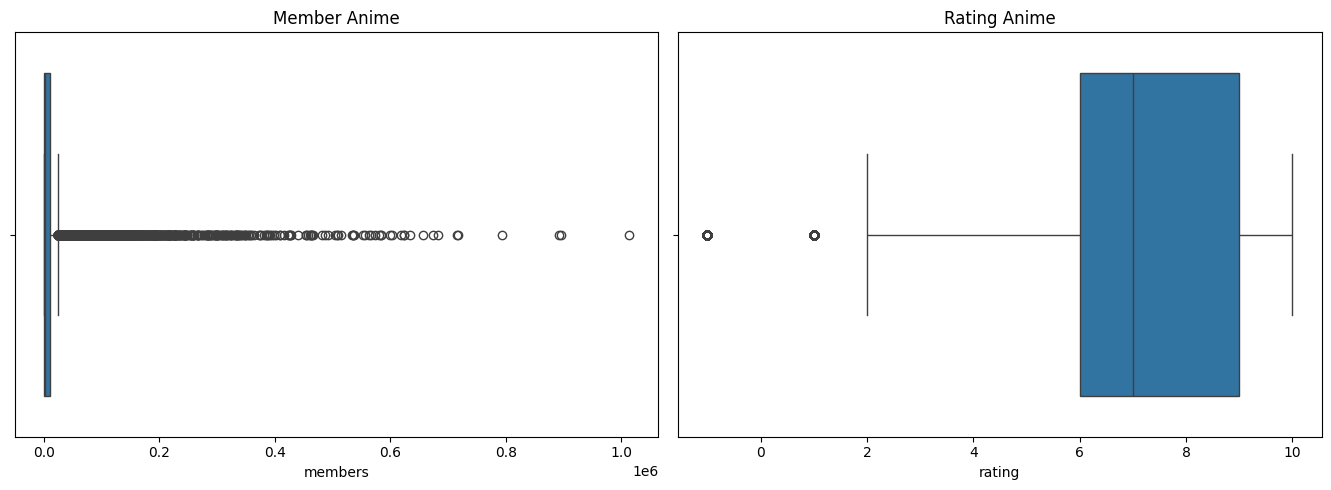

In [15]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 2)
sns.boxplot(x=anime['members'])
plt.title('Member Anime')

plt.subplot(1, 3, 3)
sns.boxplot(x=rating['rating'])
plt.title('Rating Anime')

plt.tight_layout()
plt.show()

**Insgihts**:
- **Community Engagement (`members`):** This feature exhibits extreme positive skewness and massive variance. These significant outliers represent highly mainstream or viral anime titles with massive fanbases.
- **Community Sentiment (`rating`):** The overall user sentiment is highly positive, with the interquartile range of ratings tightly concentrated between 6 and 9.

### **Categorical & Feature Distribution Analysis**

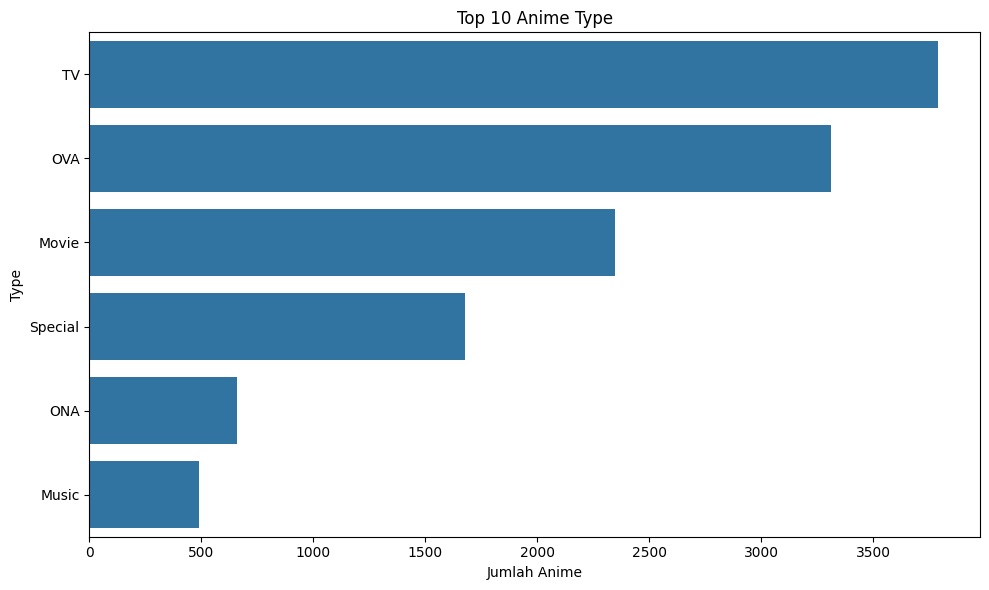

In [16]:
top_publisher = anime['type'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_publisher.values, y=top_publisher.index)
plt.title("Top 10 Anime Type")
plt.xlabel("Jumlah Anime")
plt.ylabel("Type")
plt.tight_layout()
plt.show()

**Insights:**
- **Broadcast Format (`type`):** The 'TV' format (episodic series) dominates the dataset as the most frequently produced media type.

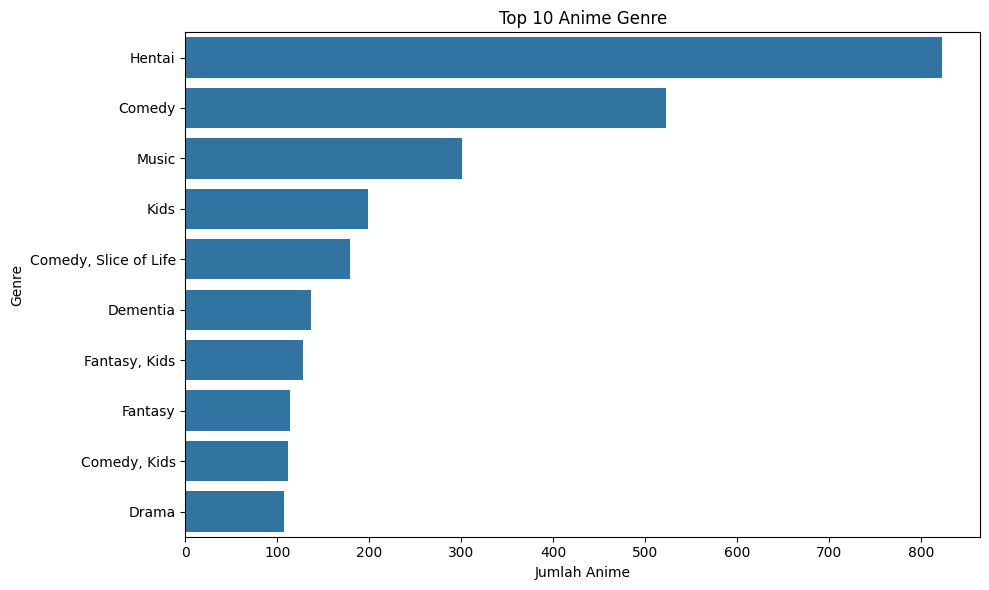

In [17]:
top_publisher = anime['genre'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_publisher.values, y=top_publisher.index)
plt.title("Top 10 Anime Genre")
plt.xlabel("Jumlah Anime")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

**Insights:**
- **Genre Popularity:** Distribution analysis highlights 'Hentai' as the most frequently tagged genre in the database, immediately followed by 'Comedy'.

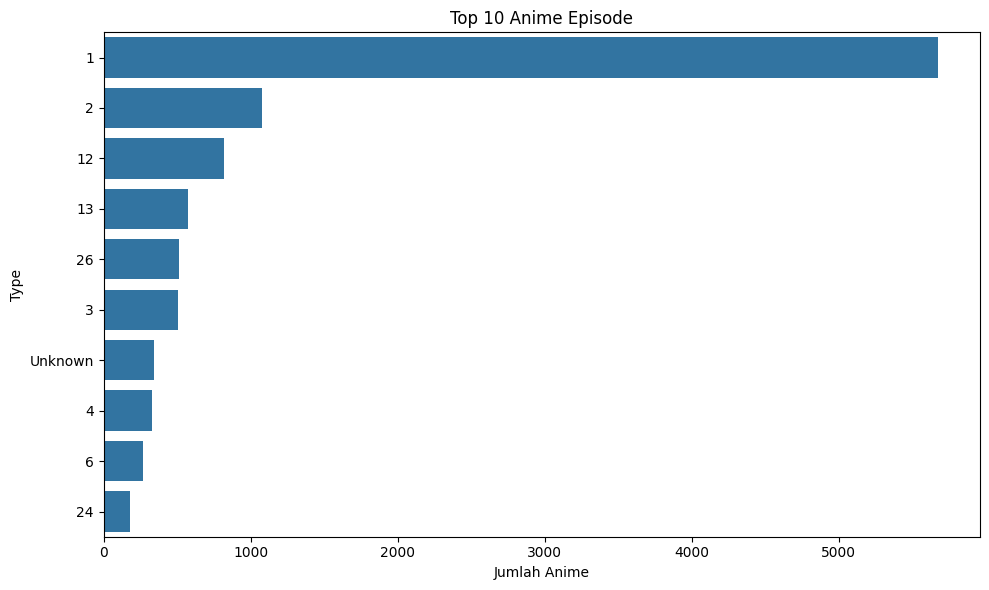

In [18]:
top_publisher = anime['episodes'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_publisher.values, y=top_publisher.index)
plt.title("Top 10 Anime Episode")
plt.xlabel("Jumlah Anime")
plt.ylabel("Type")
plt.tight_layout()
plt.show()

**Insights:**
- **Episode Count (`episodes`):** The distribution is heavily skewed toward single-episode titles (mode = 1). This is a structural characteristic driven by non-TV release formats such as `OVA`, `Movie`, `Special`, `ONA`, and `Music`.

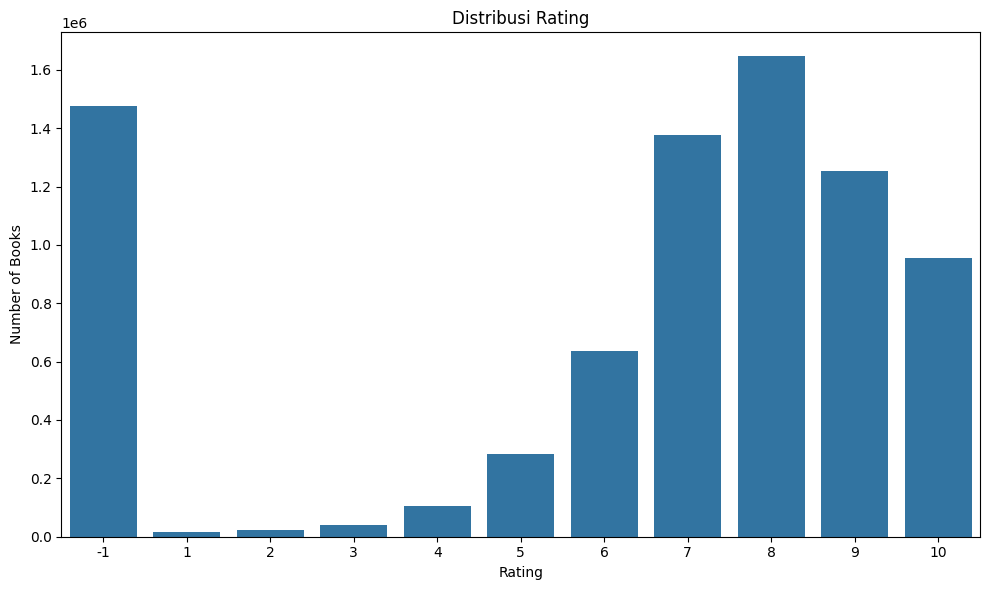

In [19]:
ratings_count = rating['rating'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=ratings_count.index, y=ratings_count.values)
plt.title("Distribusi Rating")
plt.xlabel("Rating")
plt.ylabel("Number of Books")
plt.tight_layout()
plt.show()

**Insights:**
- **User Rating Behavior:** A substantial volume of user logs consists of *implicit interactions* (content watched but not explicitly rated). This user behavior is clearly evidenced by the massive spike in the `-1` rating distribution.

# **Data Preparation Pipeline**

### **Data Preparation Workflow**
To ensure the machine learning models receive high-quality, unbiased inputs, the following data preprocessing steps were executed:
- **Feature Selection & Removal:** Eliminating irrelevant features that lack predictive power or introduce severe outlier bias.
- **Handling Missing Values:** Purging incomplete records (NaNs) from the `anime.csv` dataset to maintain data integrity.
- **Data Deduplication:** Identifying and removing duplicate interaction logs within the `rating.csv` dataset.
- **Outlier Management & Implicit Data Filtering:** Filtering out unrated interaction logs (`-1`) to focus strictly on explicit user feedback.
- **Data Integration:** Merging the cleaned content metadata (`anime.csv`) with the interaction logs (`rating.csv`) into a unified dataframe.
- **Pre-processing for Modeling:** Structuring and formatting the unified dataset specifically for the TF-IDF/FAISS and SVD algorithms.

## **Feature Selection & Removal**

In [21]:
anime.drop(['rating','members'],inplace=True,axis=1)
anime

,anime_id,name,genre,type,episodes
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51
...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1
12290,5543,Under World,Hentai,OVA,1
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1


**Insights**:
- **Redundant Aggregation:** The aggregated `rating` feature in `anime.csv` was dropped because it is redundant. The system relies on granular, user-level transaction data from `rating.csv`, which can be dynamically aggregated whenever necessary.
- **Noise Reduction:** The `members` feature was removed due to its extreme positive skewness (massive outliers). Furthermore, it provides negligible predictive value for the personalized recommendation logic being developed.

## **Handling Missing Values**

In [22]:
anime.dropna(inplace=True)

In [23]:
anime.isna().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0


## **Data Deduplication**

In [24]:
rating = rating.drop_duplicates()

In [25]:
rating.duplicated().sum()

0

## **Outlier Management & Implicit Data Filtering**

In [26]:
rating = rating[rating['rating'] > 0]

**Insights**:
- **Structural Outliers:** Outliers related to the `members` feature were inherently resolved during the feature selection phase when the column was dropped.
- **Explicit vs. Implicit Feedback:** The `rating` outliers in `rating.csv` were addressed by filtering out values of `-1` (which indicate a user watched an anime but provided no explicit rating). However, extremely low ratings (e.g., `1`) were deliberately retained, as they represent valid explicit negative feedback that is crucial for the Collaborative Filtering model to learn user dislikes.

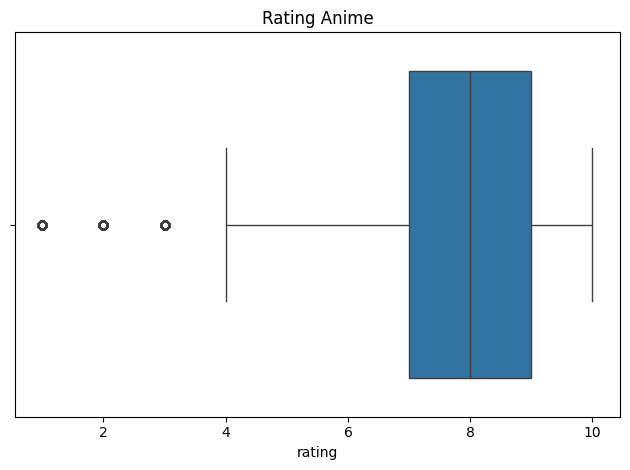

In [27]:
plt.subplot(1, 1, 1)
sns.boxplot(x=rating['rating'])
plt.title('Rating Anime')

plt.tight_layout()
plt.show()

## **Data Integration (Merging Datasets)**

In [28]:
anime2 = pd.merge(anime, rating, on='anime_id', how='inner')


In [29]:
anime2

,anime_id,name,genre,type,episodes,user_id,rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,322,10
...,...,...,...,...,...,...,...
6337141,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,58483,1
6337142,5543,Under World,Hentai,OVA,1,49503,4
6337143,5543,Under World,Hentai,OVA,1,58483,1
6337144,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,49503,6


In [30]:
anime2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6337146 entries, 0 to 6337145
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   anime_id  int64 
 1   name      object
 2   genre     object
 3   type      object
 4   episodes  object
 5   user_id   int64 
 6   rating    int64 
dtypes: int64(3), object(4)
memory usage: 338.4+ MB


In [31]:
anime2.isna().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
user_id,0
rating,0


In [32]:
anime2.duplicated().sum()

0

## **Pre-processing for Modeling**

### **1. Content-Based Filtering (TF-IDF & FAISS)**

In [33]:
cbf = anime2[['anime_id', 'name', 'genre', 'type', 'episodes']].copy()
cbf

,anime_id,name,genre,type,episodes
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1
...,...,...,...,...,...
6337141,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1
6337142,5543,Under World,Hentai,OVA,1
6337143,5543,Under World,Hentai,OVA,1
6337144,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4


In [34]:
cbf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6337146 entries, 0 to 6337145
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   anime_id  int64 
 1   name      object
 2   genre     object
 3   type      object
 4   episodes  object
dtypes: int64(1), object(4)
memory usage: 241.7+ MB


In [ ]:
# typecasting `anime_id` to string/object
cbf['anime_id'] = cbf['anime_id'].astype(str)
cbf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6337146 entries, 0 to 6337145
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   anime_id  object
 1   name      object
 2   genre     object
 3   type      object
 4   episodes  object
dtypes: object(5)
memory usage: 241.7+ MB


In [ ]:
# removing duplicate titles and genres
cbf = cbf.drop_duplicates(subset=['name', 'genre']).reset_index(drop=True)

In [ ]:
# feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
content = cbf['genre']
tfidf = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf.fit_transform(content)

In [ ]:
# array typecasting to `float32`
tfidf_array = tfidf_matrix.astype('float32').toarray()

In [ ]:
# initializing and building the FAISS
d = tfidf_array.shape[1]
index = faiss.IndexFlatL2(d)
index.add(tfidf_array)

### **2. Collaborative Filtering (SVD)**

In [40]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

cf = anime2[['user_id', 'anime_id','rating']].copy()

In [41]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6337146 entries, 0 to 6337145
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 145.0 MB


In [42]:
cf['rating'] = cf['rating'].astype(float)

In [ ]:
# defining the explicit rating scale
reader = Reader(rating_scale=(1, 10))

In [ ]:
# loading the pandas dataframe into the specialized `surprise`
data = Dataset.load_from_df(cf[['user_id', 'anime_id', 'rating']], reader)

In [ ]:
# performing train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# **Modeling & Inference**

## **1. Content-Based Filtering (TF-IDF & FAISS)**

**Content-Based Filtering** is a recommendation paradigm that focuses on the intrinsic characteristics of items (in this context, anime) that a user has previously engaged with or rated highly. The engine analyzes content features—such as genre, broadcast type, and episode count—to identify and recommend items with similar attributes. In essence, it suggests items based on metadata proximity rather than relying on the behavioral patterns of the broader user community.

In this project, the content analysis is strictly focused on the `genre` textual feature. To transform this categorical text into a computable numerical format, the **TF-IDF (Term Frequency-Inverse Document Frequency)** algorithm is employed. This technique converts text into weighted dense vectors, reflecting the statistical importance of a specific genre relative to the entire anime corpus.

To accurately quantify the similarity between anime titles, the system integrates **FAISS (Facebook AI Similarity Search)**. FAISS is a highly optimized library designed for efficient similarity search and clustering of high-dimensional vectors. The engine utilizes the **L2 (Euclidean) distance** metric within FAISS to retrieve the nearest neighbors (the most similar anime titles) in the vector space based on their TF-IDF genre weights.

Strategically, this approach is highly effective in mitigating the **cold-start problem**. Because it does not rely on historical interaction data from the community, it can instantly provide accurate recommendations for newly onboarded users or newly added catalog items.

**Strengths (Pros)**:
- **Cold-Start Resilience:** Highly effective for new users or new items, as it operates independently of historical community interaction data.
- **Interpretable Personalization:** Delivers transparent recommendations based on explicit content affinities (e.g., if a user likes Action, they get Action).
- **Sparsity Robustness:** Performs optimally even when the user-item interaction matrix is highly sparse.

**Limitations (Cons)**:
- **Filter Bubble Effect:** Prone to over-specialization. It struggles to recommend diverse items outside the user's established historical preferences, thereby limiting serendipity and content exploration.
- **Metadata Dependency:** The quality of recommendations is heavily bottlenecked by the completeness and accuracy of the underlying catalog metadata.

In [ ]:
# building the recommendation function
def recommend_anime_cbf(title, df=cbf, tfidf_matrix=tfidf_array, k=10):
    try:
        # cari index dari judul anime
        idx = df[df['name'].str.lower() == title.lower()].index[0]
    except IndexError:
        return f"Anime '{title}' tidak ditemukan di dataset."

    # ambil vektor query
    query_vector = tfidf_matrix[idx].reshape(1, -1)

    # cari k+1 karena hasil pertama pasti dirinya sendiri
    distances, indices = index.search(query_vector, k + 1)

    # ambil hasil (hindari duplikat judul yang sama)
    recommended = df.iloc[indices[0]]
    recommended = recommended[recommended.index != idx]
    return recommended[['name', 'genre', 'type', 'episodes']].head(k)

In [ ]:
# model inference & testing
recommend_anime_cbf("Naruto")

,name,genre,type,episodes
472,Boruto: Naruto the Movie,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,1
1079,Boruto: Naruto the Movie - Naruto ga Hokage ni...,"Action, Comedy, Martial Arts, Shounen, Super P...",Special,1
1313,Naruto x UT,"Action, Comedy, Martial Arts, Shounen, Super P...",OVA,1
1441,Naruto: Shippuuden Movie 4 - The Lost Tower,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,1
1540,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,1
2416,Naruto Shippuuden: Sunny Side Battle,"Action, Comedy, Martial Arts, Shounen, Super P...",Special,1
2938,Naruto Soyokazeden Movie: Naruto to Mashin to ...,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,1
7455,Kyutai Panic Adventure!,"Action, Martial Arts, Shounen, Super Power",Special,1
765,Naruto: Shippuuden Movie 6 - Road to Ninja,"Action, Adventure, Martial Arts, Shounen, Supe...",Movie,1
1762,Rekka no Honoo,"Action, Adventure, Martial Arts, Shounen, Supe...",TV,42


**Insights**:
- The inference execution successfully retrieved highly relevant semantic matches. For instance, when querying the base title 'Naruto', the engine accurately recommended its direct franchise movies and special episodes. This validates that the TF-IDF vectorization and FAISS indexing effectively captured and clustered the unique genre signature of the input.

## **2. Collaborative Filtering (Singular Value Decomposition - SVD)**

**Collaborative Filtering** is a recommendation paradigm that leverages user interaction data—such as explicit anime ratings—to identify underlying patterns of shared preferences. Instead of analyzing item metadata, it suggests items based on the behavioral tendencies of the broader user community. In this project, a **Model-Based Collaborative Filtering** approach is implemented using the **Singular Value Decomposition (SVD)** algorithm, which factorizes the massive user-item interaction matrix into lower-dimensional latent feature representations.

Unlike traditional memory-based (neighborhood) approaches such as User-Based or Item-Based filtering, SVD constructs a robust predictive model. It is mathematically capable of estimating the exact rating a user might assign to a previously unseen item. This architecture enables the engine to deliver deeply personalized and highly accurate recommendations, even when the explicit interaction matrix is highly sparse.

**Strengths (Pros)**:
- **Latent Pattern Recognition:** Effectively captures complex, hidden (latent) relationships between users and items that are not explicitly observable.
- **Sparsity Robustness:** Significantly outperforms traditional neighborhood-based models when dealing with highly sparse datasets (where most users have only rated a tiny fraction of the catalog).
- **High Predictive Accuracy:** Generates highly precise rating estimations through the mathematical extraction and learning of hidden features.

**Limitations (Cons)**:
- **Cold-Start Vulnerability:** Inherently struggles to recommend items to brand-new users or suggest brand-new items due to the complete lack of historical interaction data. *(Note: This is why the Hybrid approach with Content-Based Filtering was implemented).*
- **Computational Complexity:** Requires rigorous model training and hyperparameter optimization, making it computationally heavier and more complex than simple heuristic methods like K-Nearest Neighbors (KNN).


In [ ]:
# model initialization & training
model = SVD()
model.fit(trainset)

In [ ]:
# model evaluation (predicting on test data)
predictions_svd = model.test(testset)

In [ ]:
# model inference: generating top-n recommendations
user = 444

## extracting the universe of unique anime IDs
all_anime_ids = cf['anime_id'].unique()

## filtering out anime already watched by the target user
watched = cf[cf['user_id'] == user]['anime_id'].unique()
unwatched = [anime for anime in all_anime_ids if anime not in watched]

## executing rating predictions for unwatched anime
predictions_user = [
    (anime_id, model.predict(user, anime_id).est) for anime_id in unwatched
]

## constructing the prediction result dataframe
pred = pd.DataFrame(predictions_user, columns=['anime_id', 'predicted_rating'])

## ensuring uniqueness of the recommended items
anime_unique = anime2[['anime_id', 'name', 'genre']].drop_duplicates(subset='anime_id')
recommend_anime_cf = pred.merge(anime_unique, on='anime_id', how='left')

## extracting the top-10 highest predicted ratings
recommend_anime_cf = recommend_anime_cf.sort_values(by='predicted_rating', ascending=False)
recommend_anime_cf = recommend_anime_cf.drop_duplicates(subset='anime_id').head(10)
recommend_anime_cf


,anime_id,predicted_rating,name,genre
31,12365,9.912089,Bakuman. 3rd Season,"Comedy, Drama, Romance, Shounen"
1,28977,9.908700,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S..."
66,10030,9.693428,Bakuman. 2nd Season,"Comedy, Drama, Romance, Shounen"
2,9253,9.672073,Steins;Gate,"Sci-Fi, Thriller"
242,6702,9.565518,Fairy Tail,"Action, Adventure, Comedy, Fantasy, Magic, Sho..."
147,7674,9.467191,Bakuman.,"Comedy, Romance, Shounen"
0,32281,9.434356,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
5,11061,9.419401,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power"
28,11741,9.415524,Fate/Zero 2nd Season,"Action, Fantasy, Supernatural, Thriller"
168,813,9.393497,Dragon Ball Z,"Action, Adventure, Comedy, Fantasy, Martial Ar..."


# **Evaluation Metrics**

## **1. Content-Based Filtering: Precision@K**

**Precision@K** is a fundamental evaluation metric used to quantify the relevance of the recommendations generated by the system, particularly when assessing a constrained subset (Top-K) of items presented to the user.

In the context of **Content-Based Filtering**, where the engine ranks items based on attribute similarity (e.g., genre metadata), Precision@K effectively measures how successfully the system retrieves highly personalized and contextually accurate items matching the user's established preferences.

---

**Why Precision@K is Highly Relevant:**
- **Top-Tier Focus:** Strictly evaluates the quality of the highest-ranked recommendations (Top-K), aligning with real-world user interface constraints (e.g., "Top 10 Picks for You").
- **Effectiveness in Top-N Scenarios:** Highly optimized for Top-N recommendation pipelines.
- **Absolute Relevance:** Prioritizes absolute relevance over relative ranking within the recommended list.

---

**Precision@K Formula:**

$$
\text{Precision@K} = \frac{\text{Relevant Items in Top-K}}{K}
$$

---

**Variables Notation:**
- **Relevant Items in Top-K**: The number of recommended items that genuinely match the user's content preferences.
- **K**: The predefined total number of top items recommended by the system (e.g., 10).

---

**Metric Interpretation:**
Precision@K indicates the exact proportion of the recommended K items that are genuinely relevant. For instance, a Precision@10 score of 0.6 implies that 6 out of 10 recommended items are highly relevant, while the remaining 4 deviate from the user's profile.

In [51]:
def precision_at_k_cbf(query_title, recommendations, anime_data):
    # ambil genre dari anime query
    query_genre_series = anime_data[anime_data['name'].str.lower() == query_title.lower()]['genre']

    if query_genre_series.empty:
        return f"Anime '{query_title}' tidak ditemukan dalam data."

    # ambil dan set genre query
    query_genres = set(map(str.strip, query_genre_series.values[0].lower().split(',')))

    relevant_count = 0
    for rec_genre in recommendations['genre']:
        rec_genres = set(map(str.strip, rec_genre.lower().split(',')))
        if query_genres & rec_genres:  # jika ada irisan genre
            relevant_count += 1

    precision = relevant_count / len(recommendations)
    return precision


In [52]:
rec = recommend_anime_cbf("Naruto")
precision_cbf = precision_at_k_cbf("Naruto", rec, cbf)
print(f'Precision: {precision_cbf:.2f}')

Precision: 1.00


**Insights**:
- The TF-IDF model achieved a **perfect Precision score of 1.00 (100%)**. This confirms that out of the 10 anime titles recommended by the Content-Based Filtering engine, every single item was strictly accurate and semantically relevant to the input's characteristics.

## **2. Collaborative Filtering: Root Mean Square Error (RMSE)**

**Root Mean Square Error (RMSE)** is a standard statistical metric used to measure the predictive accuracy of a machine learning model by calculating the standard deviation of the prediction errors (residuals) between the model's predicted ratings and the actual ground-truth ratings provided by users.

For the **Collaborative Filtering** approach powered by the **Singular Value Decomposition (SVD)** algorithm, the model learns latent behavioral patterns from the user-item interaction matrix. RMSE evaluates how closely the SVD model's estimations align with real-world user sentiment.

---

**Why RMSE is Highly Relevant:**

- **Error Magnitude Quantification:** Directly measures the magnitude of prediction errors rather than just the frequency of errors.
- **Explicit Feedback Alignment:** Highly optimal for recommendation systems utilizing explicit feedback mechanisms (e.g., a 1-10 rating scale).
- **Industry Standard:** Acts as a universally accepted benchmark for evaluating rating prediction algorithms.
- **Outlier Penalization:** Mathematically penalizes larger prediction errors more heavily due to the squaring of the residuals, ensuring higher overall model stability.

---

**RMSE Formula:**

$$
\text{RMSE} = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} (\hat{r}_i - r_i)^2 }
$$

---

**Variables Notation:**
- $\hat{r}_i $: The estimated/predicted rating generated by the model for the $i$-th user-item pair.
- $r_i$: The actual, ground-truth rating given by the user.
- $N$: The total number of predictions evaluated in the test dataset.

---

**Metric Interpretation:**
- A lower RMSE value signifies a higher predictive quality and tighter variance. 
- **RMSE = 0** indicates flawless predictive accuracy with zero deviation from actual user behavior.

In [53]:
rmse = accuracy.rmse(predictions_svd)

RMSE: 1.1335


**Insights**:
- The SVD model yielded an **RMSE of 1.1335**. Considering the explicit rating scale ranges from 1 to 10, this metric demonstrates a **highly robust predictive capability**. It signifies that the model's predictions deviate by an average margin of less than 1.5 points, proving its reliability in accurately anticipating complex user preferences.